In [1]:
# Import all the functions you need
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
import os
from pathlib import Path
import platform

# Comment here to add in for either mac or linux computer
if platform.system() == "Linux":   # for linux
    sys.path.extend(['/data/GitHub/NeuroPy']) 
    sys.path.extend(['/data/GitHub/TraceFC/'])
elif platform.system() == "Darwin":
    sys.path.extend(['/Users/nkinsky/Documents/UM/GitHub/NeuroPy'])
    sys.path.extend(['/Users/nkinsky/Documents/UM/GitHub/TraceFC'])
elif platform.system() == "Windows":
    print('No windows repositories defined')

from neuropy import core
from neuropy.io import (optitrackio,
                        dlcio,
                        )
from neuropy.io.miniscopeio import MiniscopeIO
from neuropy.core import Epoch
from neuropy.utils import plot_util
from neuropy.utils.signal_process import WaveletSg
from neuropy.plotting.spikes import plot_raster, plot_binned_raster
from neuropy.plotting.signals import plot_signal_w_epochs, plot_spectrogram

from tracefc.io.session_directory import get_session_dir

In [2]:
# Define a class for a typical recording or set of recordings
from neuropy.core.session import ProcessData
    
def sess_use(basepath=os.getcwd()):

    return ProcessData(basepath)

In [3]:
# Loop through and load in artifacts, signal, and do delta wavelet
training_sessions = [['Rey', 'training'],['Django', 'training'], ['Finn2', 'training'],['Rose', 'training'], ['Jyn','training'],['Han','training']]
delta_channels = [26, 59, 7, 25, 18, 8]
delta_range = np.arange(0.2, 3.5, 0.1)
rec_list = []


for (animal, sess_name), delta_channel in zip(training_sessions, delta_channels):
    
    sess_dir = get_session_dir(animal, sess_name)
    sess = sess_use(sess_dir)
    art_epochs_file = sess.filePrefix.with_suffix(".art_epochs.npy")
    sess.signal = sess.eegfile.get_signal()
    sess.art_epochs = Epoch(epochs=None, file=art_epochs_file)
    signal = sess.eegfile.get_signal()
    sess.wv_delta = WaveletSg(signal.time_slice(channel_id=delta_channel, t_stop=np.min((80*60, signal.t_stop))), 
                              freqs=delta_range, sigma=None)
    
    rec_list.append(sess)
rec_list
# print(sess.recinfo)

[ProcessData(Rey_training_denoised.xml),
 ProcessData(Django_training_denoised.xml),
 ProcessData(Finn2_training_denoised.xml),
 ProcessData(Rose_training_denoised.xml),
 ProcessData(Jyn_training_denoised.xml),
 ProcessData(Han_training.xml)]

In [54]:
rec_list

[ProcessData(Rey_training_denoised.xml),
 ProcessData(Django_training_denoised.xml),
 ProcessData(Finn2_training_denoised.xml),
 ProcessData(Rose_training_denoised.xml),
 ProcessData(Jyn_training_denoised.xml),
 ProcessData(Han_training.xml)]

In [55]:
# Import USVs
usv_list = []
for sess in rec_list:
    # Import USV epochs (from Sync_USV_and_Ephys notebook).
    usv_epochs_file = sess.filePrefix.with_suffix(".usv_epochs.npy")
    usv_epochs = Epoch(epochs=None, file=usv_epochs_file)
    usv_list.append(usv_epochs)

In [6]:
delta_range

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4])

In [7]:
usv_epochs.to_dataframe().drop(index=72)

,start,stop,Begin_Time,Freq_Min,Duration,Freq_Range,Score,Accept,nrec,t_start_eeg,t_stop_eeg,label,duration
0,446.819063,446.912341,446.819063,32.435751,0.093278,45.195929,1.000000,1,2,860.598041,860.691307,,0.093278
1,446.917153,446.991495,446.917153,50.405216,0.074342,34.441476,1.000000,1,2,860.696118,860.770450,,0.074342
2,447.052188,447.165813,447.052188,43.482818,0.113625,16.668958,1.000000,1,2,860.831136,860.944746,,0.113625
3,447.256451,447.308525,447.256451,46.914662,0.052074,11.521191,1.000000,1,2,861.035373,861.087440,,0.052074
4,447.305980,447.444434,447.305980,32.451890,0.138454,9.315006,1.000000,1,2,861.084896,861.223332,,0.138454
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,1248.889305,1249.515682,1248.889305,14.512427,0.626377,7.111111,1.000000,1,3,1624.587944,1625.214228,,0.626377
103,1249.601622,1250.095759,1249.601622,14.055556,0.494137,7.777778,1.000000,1,3,1625.300156,1625.794220,,0.494137
104,1250.187977,1250.820431,1250.187977,13.728436,0.632454,8.777778,1.000000,1,3,1625.886424,1626.518784,,0.632454
105,1250.920864,1251.461750,1250.920864,15.388889,0.540886,7.000000,1.000000,1,3,1626.619202,1627.160008,,0.540886


In [8]:
usv_list

[31 epochs
 Snippet: 
          start        stop  Begin_Time   Freq_Min  Duration  Freq_Range  Score  \
 0  918.489945  918.545653  454.143559  41.270313  0.058728   12.706250    1.0   
 1  918.830174  918.913128  454.502235  48.738021  0.087452    9.696875    1.0   
 2  919.498451  919.591260  455.206745  39.821354  0.097841   14.378125    1.0   
 3  920.429279  920.545830  456.188042  41.381771  0.122870   12.594792    1.0   
 4  920.954249  921.046723  456.741475  41.716146  0.097488    6.353125    1.0   
 
    Accept label  
 0       1        
 1       1        
 2       1        
 3       1        
 4       1        ,
 299 epochs
 Snippet: 
           start         stop  Begin_Time   Freq_Min  Duration  Freq_Range  \
 0  1099.471268  1099.554172  479.631519  37.931231  0.082915   25.781799   
 1  1099.749291  1099.833033  479.909576  43.574457  0.083752   21.466391   
 2  1100.246300  1100.312456  480.406645  41.472079  0.066164   19.585315   
 3  1100.754614  1100.810833  480.91

In [9]:
sess.art_epochs._epochs

,start,stop,label
0,159.7436,170.1324,None
1,408.2588,417.1892,None
2,859.7700,861.2836,None
3,1131.6012,1133.1612,None
4,1388.3636,1389.8148,None
5,1428.2516,1440.1052,None
6,1606.8492,1608.3668,None
7,1857.1372,1858.7028,None
8,2132.0428,2133.4652,None
9,2508.8548,2516.5156,None


<Axes: >

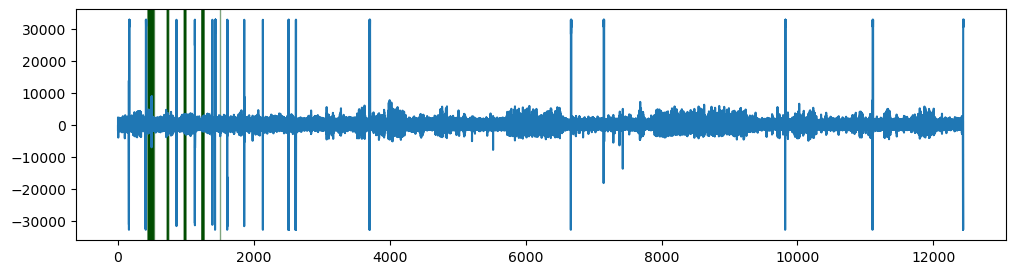

In [10]:
plot_signal_w_epochs(sess.signal, channel=3, epochs=usv_epochs)

In [65]:
wv_delta_mean

Rey


interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

Django


interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

Finn2


interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

Rose


interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

Jyn


interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

Han
Han
test2


interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

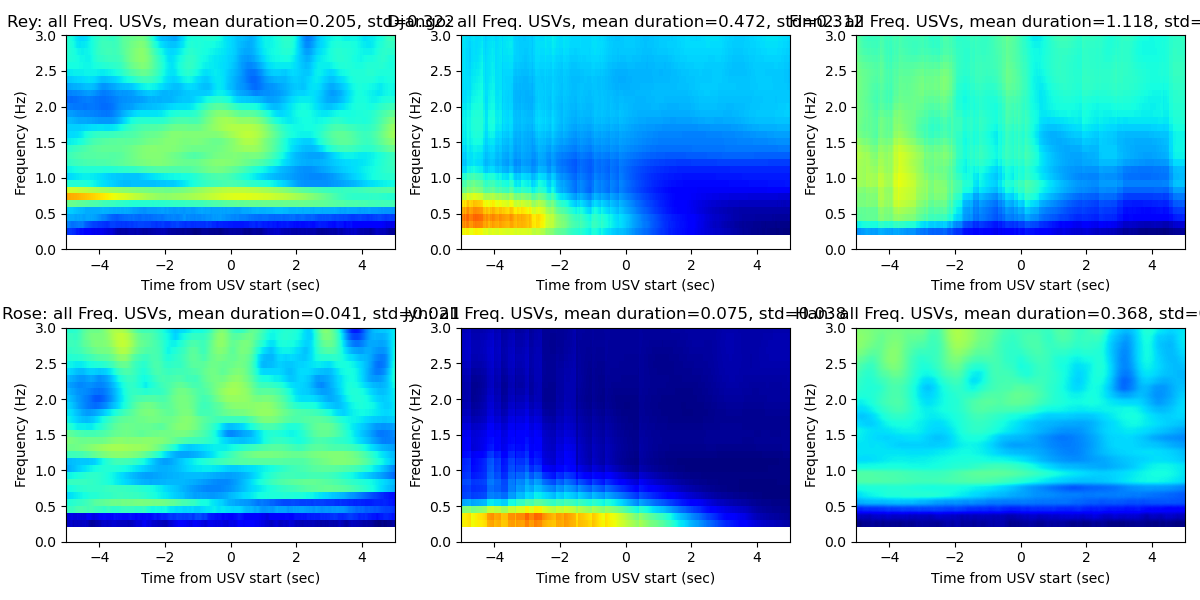

In [74]:
##All USV all animal
%matplotlib widget
delta_freq_lims = [0.2, 3.5]
usv_buffer_sec = (5,5)

_, ax = plt.subplots(2, 3, figsize=(12, 6), tight_layout=True)

for (animal, sess_name), sess, usv_epochs, a in zip(training_sessions, rec_list, usv_list, ax.reshape(-1)):
    all_usvs = usv_epochs._epochs

    try:
        print(animal)
        if (animal == 'Han') and (sess_name == 'training'):
            # usv_epochs.to_dataframe().drop(index=72)
            print("Han")
            wv_delta_mean = sess.wv_delta.get_pe_mean_spec(all_usvs.iloc[0:72]['start'].values, buffer_sec=usv_buffer_sec, 
                                                           ignore_epochs=sess.art_epochs, print_ignored_frames=False)
            # ax = plot_spectrogram(wv_delta_mean, time_lims=np.multiply(usv_buffer_sec, (-2, 2)), freq_lims=[0.2, 3.5])
            plot_spectrogram(wv_delta_mean.traces, time_lims=np.multiply(usv_buffer_sec, (-1, 1)), freq_lims=[0.2, 3.5], ax=a)
            a.set_xlabel('Time from USV start (sec)')
            a.set_title(f"{animal}: all Freq. USVs, mean duration={all_usvs.Duration.mean():.3f}, std={all_usvs.Duration.std():.3f}")
            
        else:
            wv_delta_mean = sess.wv_delta.get_pe_mean_spec(all_usvs['start'].values, buffer_sec=usv_buffer_sec, 
                                                        ignore_epochs=sess.art_epochs, print_ignored_frames=False)
            plot_spectrogram(wv_delta_mean, time_lims=np.multiply(usv_buffer_sec, (-1, 1)), freq_lims=[0.2, 3.5], ax=a)
            a.set_xlabel('Time from USV start (sec)')
            a.set_title(f"{animal}: all Freq. USVs, mean duration={all_usvs.Duration.mean():.3f}, std={all_usvs.Duration.std():.3f}")
    except ValueError:
        print(f"error in {animal} {sess_name}")

In [37]:
usv_epochs.to_dataframe().iloc[70:73, :]

,start,stop,Begin_Time,Freq_Min,Duration,Freq_Range,Score,Accept,nrec,t_start_eeg,t_stop_eeg,label,duration
70,738.883746,738.911585,738.883746,39.055556,0.027839,8.333333,1.0,1,2,1152.625437,1152.653273,,0.027839
71,975.410387,976.714354,975.410387,18.055556,1.303967,10.777778,1.0,1,2,1389.121883,1390.425683,,1.303967
72,976.786992,977.345337,976.786992,16.883376,0.558345,6.111111,1.0,1,2,1390.498312,1391.056585,,0.558345


In [38]:
wv_delta_mean = sess.wv_delta.get_pe_mean_spec(usv_epochs.to_dataframe().iloc[0:72]['start'].values, buffer_sec=usv_buffer_sec, 
                                                           ignore_epochs=sess.art_epochs, print_ignored_frames=False)
np.std(wv_delta_mean.traces)

33317.035

In [39]:
(animal == 'Han') and (sess_name == 'training')

True

In [40]:
training_sessions

[['Rey', 'training'],
 ['Django', 'training'],
 ['Finn2', 'training'],
 ['Rose', 'training'],
 ['Jyn', 'training'],
 ['Han', 'training']]

In [41]:
sess_name

'training'

In [42]:
6*np.std(wv_delta_mean.traces)

199902.2109375

In [43]:
wv_delta_mean.traces.max()

232463.38

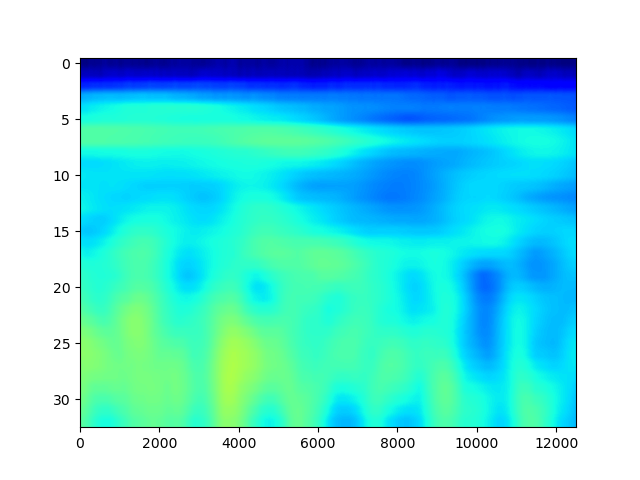

In [44]:
_, ax = plt.subplots()
ax.imshow(wv_delta_mean.traces, cmap='jet', vmax=np.mean(wv_delta_mean.traces) + 6*np.std(wv_delta_mean.traces), aspect="auto")

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

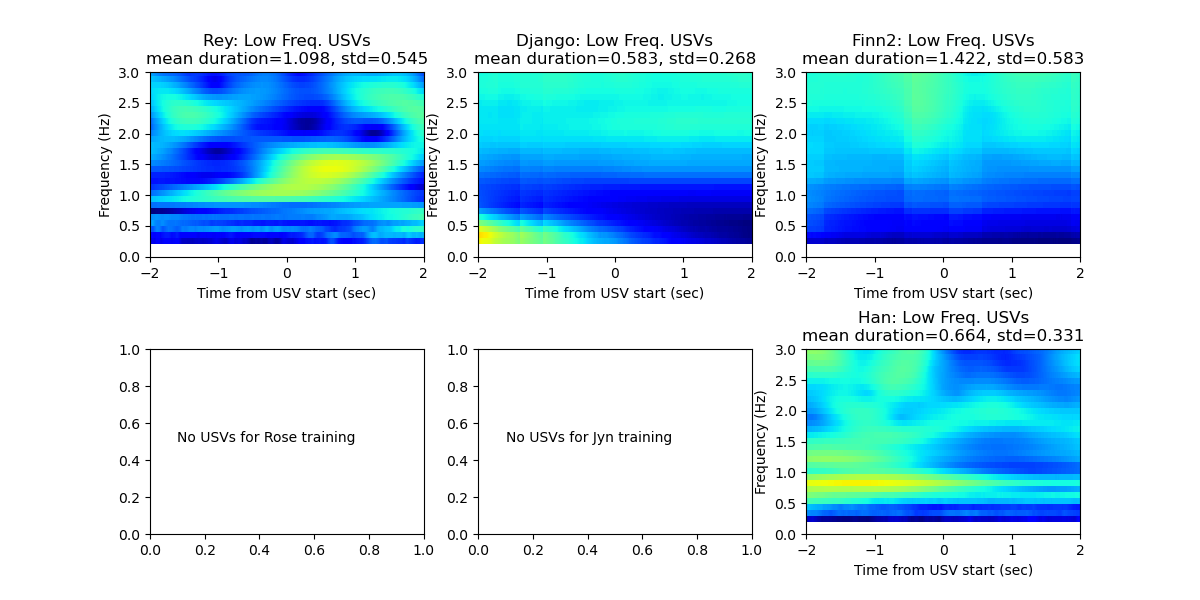

In [79]:
#All low USV
%matplotlib widget
freq_thresh = 22
delta_freq_lims = [0.2, 3.5]
usv_buffer_sec = (2,2)

fig, ax = plt.subplots(2, 3, figsize=(12, 6))

for (animal, sess_name), sess, usv_epochs, a in zip(training_sessions, rec_list, usv_list, ax.reshape(-1)):
    low_usvs = usv_epochs._epochs[usv_epochs._epochs.Freq_Min < freq_thresh]

    if low_usvs.shape[0] > 0:
        wv_delta_mean = sess.wv_delta.get_pe_mean_spec(low_usvs['start'].values, buffer_sec=usv_buffer_sec, 
                                                            ignore_epochs=sess.art_epochs, print_ignored_frames=False)
        plot_spectrogram(wv_delta_mean, time_lims=np.multiply(usv_buffer_sec, (-1, 1)), freq_lims=[0.2, 3.5], ax=a)
        a.set_xlabel('Time from USV start (sec)')
        title_text = f"{animal}: Low Freq. USVs\nmean duration={low_usvs.Duration.mean():.3f}, std={low_usvs.Duration.std():.3f}"
        a.set_title(title_text)
    else:
        a.text(0.1, 0.5, f"No USVs for {animal} {sess_name}")

plt.subplots_adjust(hspace=0.5)

In [80]:
fig.savefig('/home/bowenw/Documents/USV_plots/group_delta_low_usv_onset.pdf')

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

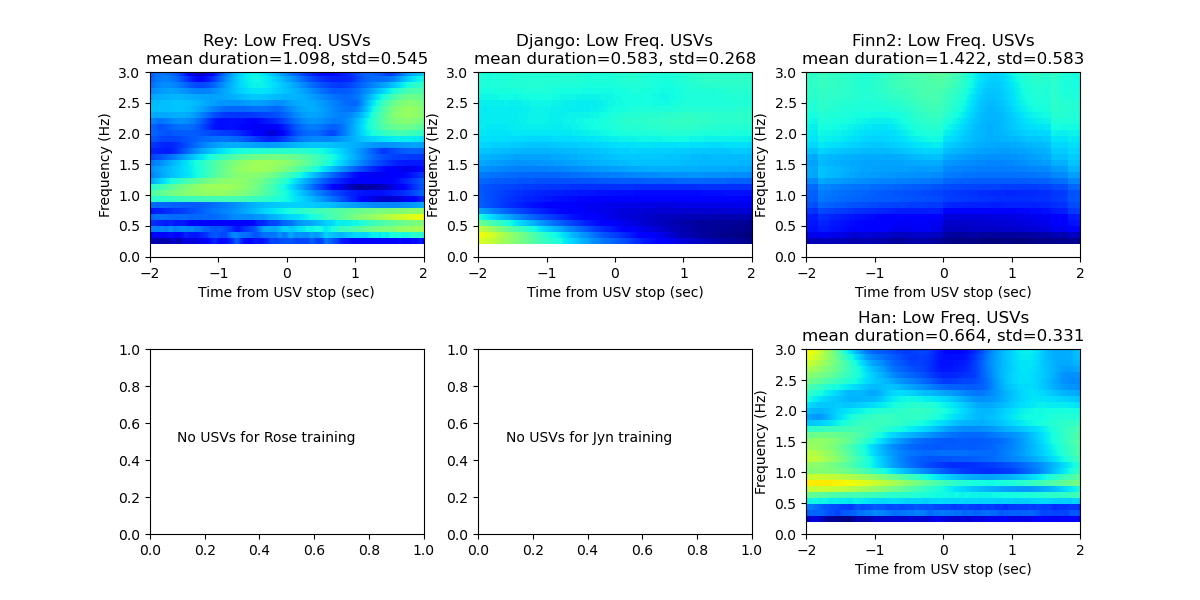

In [81]:
#All low USV
%matplotlib widget
freq_thresh = 22
delta_freq_lims = [0.2, 3.5]
usv_buffer_sec = (2,2)

fig, ax = plt.subplots(2, 3, figsize=(12, 6))

for (animal, sess_name), sess, usv_epochs, a in zip(training_sessions, rec_list, usv_list, ax.reshape(-1)):
    low_usvs = usv_epochs._epochs[usv_epochs._epochs.Freq_Min < freq_thresh]

    if low_usvs.shape[0] > 0:
        wv_delta_mean = sess.wv_delta.get_pe_mean_spec(low_usvs['stop'].values, buffer_sec=usv_buffer_sec, 
                                                            ignore_epochs=sess.art_epochs, print_ignored_frames=False)
        plot_spectrogram(wv_delta_mean, time_lims=np.multiply(usv_buffer_sec, (-1, 1)), freq_lims=[0.2, 3.5], ax=a)
        a.set_xlabel('Time from USV stop (sec)')
        title_text = f"{animal}: Low Freq. USVs\nmean duration={low_usvs.Duration.mean():.3f}, std={low_usvs.Duration.std():.3f}"
        a.set_title(title_text)
    else:
        a.text(0.1, 0.5, f"No USVs for {animal} {sess_name}")

plt.subplots_adjust(hspace=0.5)

In [82]:
fig.savefig('/home/bowenw/Documents/USV_plots/group_delta_low_usv_offset.pdf')

Rey


interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

Django


interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

Finn2


interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

Rose
error in Rose training
Jyn
error in Jyn training
Han
Han
test
test2


interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

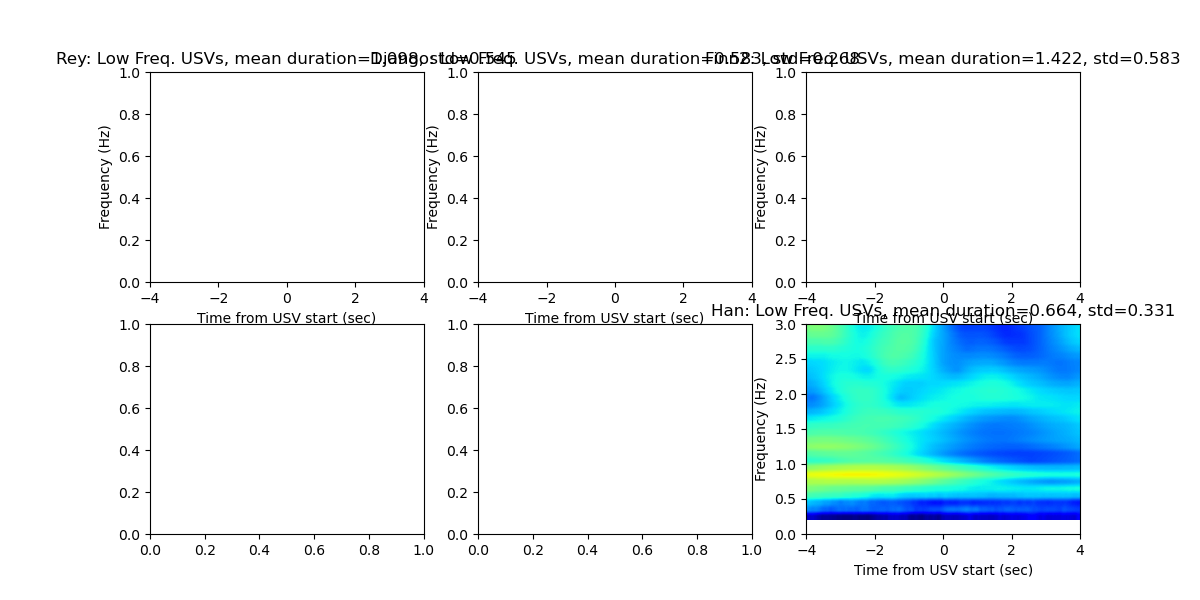

In [46]:
# Plot low USVs start for all animals 

freq_thresh = 22
delta_freq_lims = [0.2, 3.5]
usv_buffer_sec = (2,2)

_, ax = plt.subplots(2, 3, figsize=(12, 6))

for (animal, sess_name), sess, usv_epochs, a in zip(training_sessions, rec_list, usv_list, ax.reshape(-1)):
    low_usvs = usv_epochs._epochs[usv_epochs._epochs.Freq_Min < freq_thresh]

    try:
        print(animal)
        if (animal == 'Han') and (sess_name == 'training'):
            # usv_epochs.to_dataframe().drop(index=72)
            print("Han")
            wv_delta_mean = sess.wv_delta.get_pe_mean_spec(low_usvs.iloc[0:72]['start'].values, buffer_sec=usv_buffer_sec, 
                                                           ignore_epochs=sess.art_epochs, print_ignored_frames=False)
            # ax = plot_spectrogram(wv_delta_mean, time_lims=np.multiply(usv_buffer_sec, (-2, 2)), freq_lims=[0.2, 3.5])
            plot_spectrogram(wv_delta_mean.traces, time_lims=np.multiply(usv_buffer_sec, (-2, 2)), freq_lims=[0.2, 3.5], ax=a)
            a.set_xlabel('Time from USV start (sec)')
            a.set_title(f"{animal}: Low Freq. USVs, mean duration={low_usvs.Duration.mean():.3f}, std={low_usvs.Duration.std():.3f}")
            
        else:
            wv_delta_mean = sess.wv_delta.get_pe_mean_spec(low_usvs['start'].values, buffer_sec=usv_buffer_sec, 
                                                        ignore_epochs=sess.art_epochs, print_ignored_frames=False)
            plot_spectrogram(wv_delta_mean, time_lims=np.multiply(usv_buffer_sec, (-2, 2)), freq_lims=[0.2, 3.5], ax=a)
            a.set_xlabel('Time from USV start (sec)')
            a.set_title(f"{animal}: Low Freq. USVs, mean duration={low_usvs.Duration.mean():.3f}, std={low_usvs.Duration.std():.3f}")
    except ValueError:
        print(f"error in {animal} {sess_name}")
        

In [47]:
fig.savefig('/home/bowenw/Documents/USV_plots/group_delta_low_usv_onset.pdf')

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

error in Rose training
error in Jyn training


interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

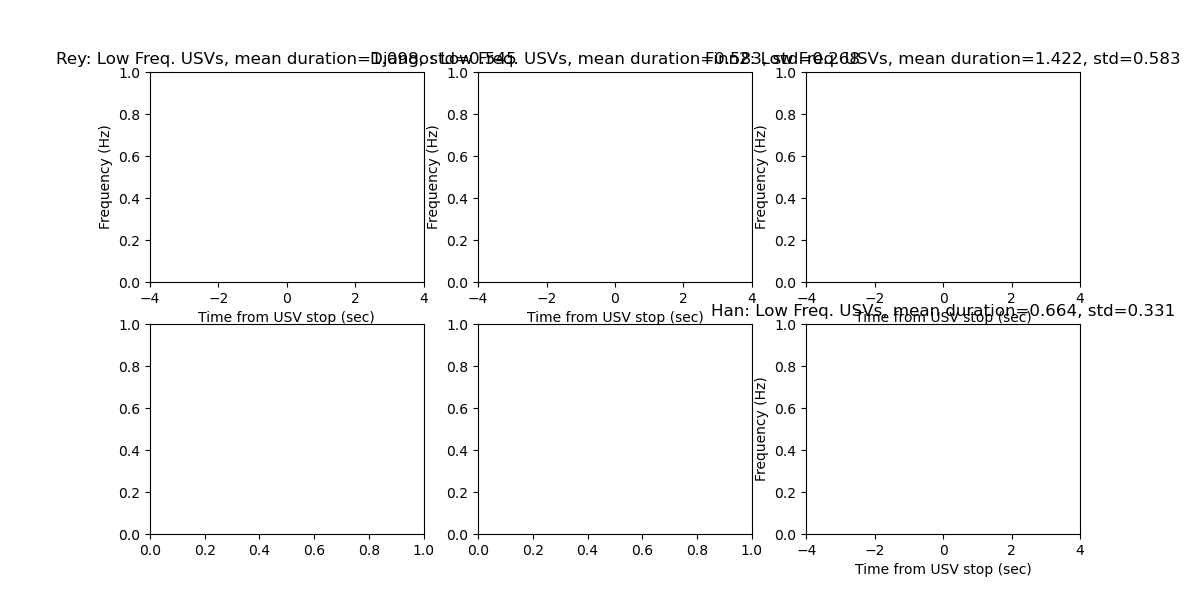

In [23]:
# Plot low USVs stop for all animals 
freq_thresh = 22
delta_freq_lims = [0.2, 3.5]
usv_buffer_sec = (2,2)

_, ax = plt.subplots(2, 3, figsize=(12, 6))

for (animal, sess_name), sess, usv_epochs, a in zip(training_sessions, rec_list, usv_list, ax.reshape(-1)):
    low_usvs = usv_epochs._epochs[usv_epochs._epochs.Freq_Min < freq_thresh]
    if low_usvs.shape[0] > 0:
      wv_delta_mean = sess.wv_delta.get_pe_mean_spec(low_usvs['stop'].values, buffer_sec=usv_buffer_sec, 
                                                        ignore_epochs=sess.art_epochs, print_ignored_frames=False)
      plot_spectrogram(wv_delta_mean, time_lims=np.multiply(usv_buffer_sec, (-2, 2)), freq_lims=[0.2, 3.5], ax=a)
      a.set_xlabel('Time from USV stop (sec)')
      a.set_title(f"{animal}: Low Freq. USVs, mean duration={low_usvs.Duration.mean():.3f}, std={low_usvs.Duration.std():.3f}")
    else:
        print(f"error in {animal} {sess_name}")

In [24]:
fig.savefig('/home/bowenw/Documents/USV_plots/group_delta_low_usv_offset.pdf')

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

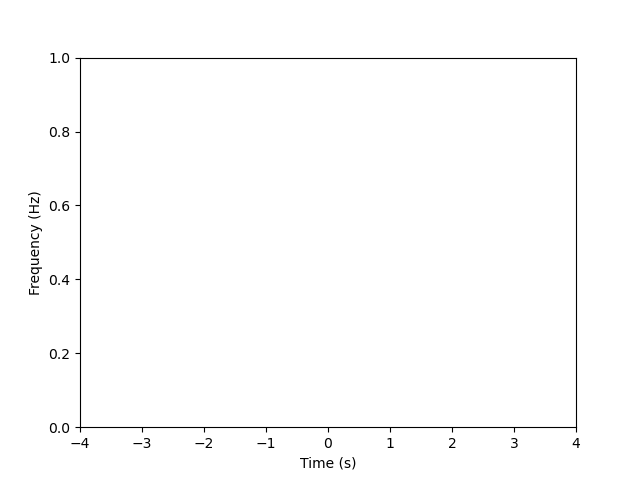

In [49]:
wv_delta_mean = sess.wv_delta.get_pe_mean_spec(usv_epochs.to_dataframe().drop(index=72)['start'].values, buffer_sec=usv_buffer_sec, 
                                                           ignore_epochs=sess.art_epochs, print_ignored_frames=False)
ax = plot_spectrogram(wv_delta_mean, time_lims=np.multiply(usv_buffer_sec, (-2, 2)), freq_lims=[0.2, 3.5])

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

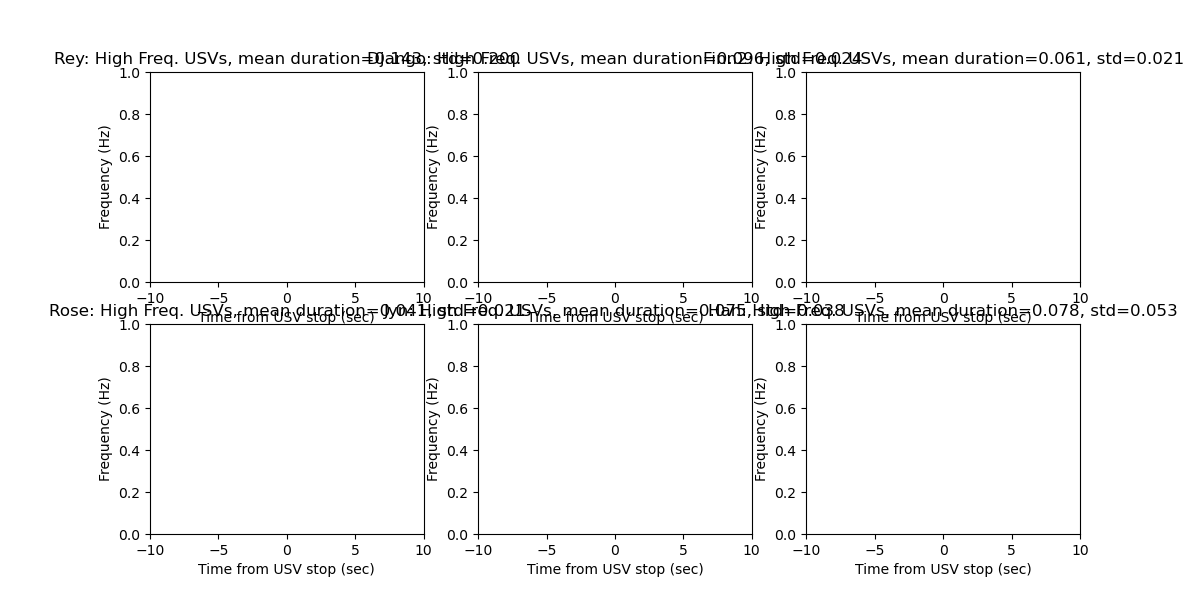

In [26]:
# Plot high USVs for all animals
%matplotlib widget
freq_thresh = 22
delta_freq_lims = [0.2, 3.5]
usv_buffer_sec = (5,5)

_, ax = plt.subplots(2, 3, figsize=(12, 6))

for (animal, sess_name), sess, usv_epochs, a in zip(training_sessions, rec_list, usv_list, ax.reshape(-1)):
    high_usvs = usv_epochs._epochs[usv_epochs._epochs.Freq_Min > freq_thresh]
    if high_usvs.shape[0] > 0:
      wv_delta_mean = sess.wv_delta.get_pe_mean_spec(high_usvs['stop'].values, buffer_sec=usv_buffer_sec, 
                                                        ignore_epochs=sess.art_epochs, print_ignored_frames=False)
      plot_spectrogram(wv_delta_mean, time_lims=np.multiply(usv_buffer_sec, (-2, 2)), freq_lims=[0.2, 3.5], ax=a)
      a.set_xlabel('Time from USV stop (sec)')
      a.set_title(f"{animal}: High Freq. USVs, mean duration={high_usvs.Duration.mean():.3f}, std={high_usvs.Duration.std():.3f}")
    else:
        print(f"error in {animal} {sess_name}")

In [27]:
fig.savefig('/home/bowenw/Documents/USV_plots/group_delta_high_usv_onset.pdf')

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

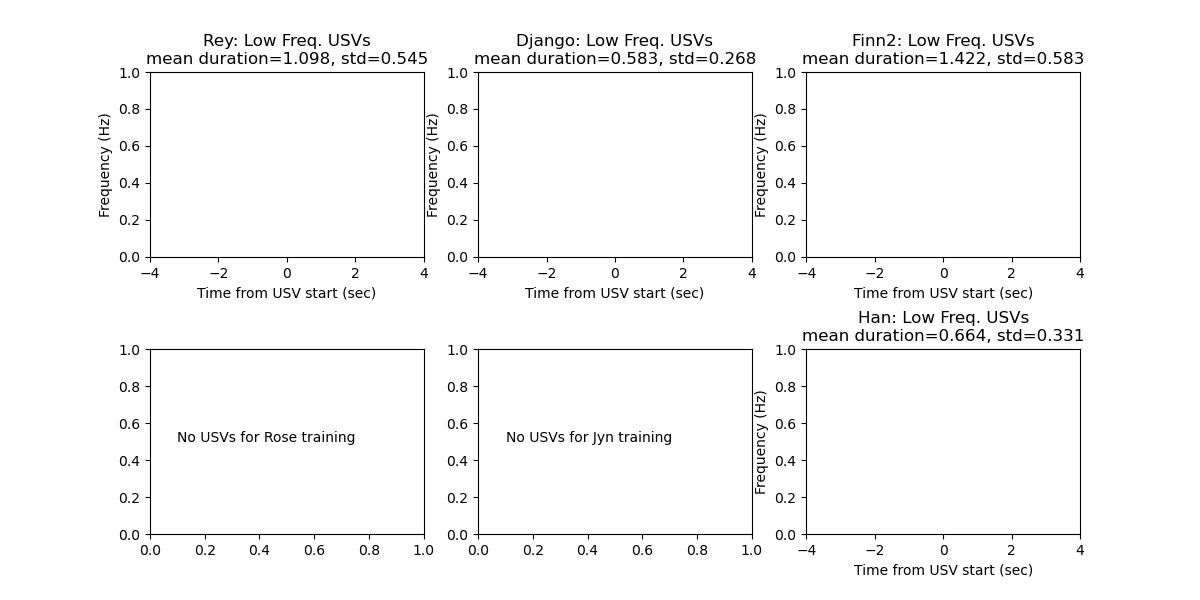

In [28]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

freq_thresh = 22
delta_freq_lims = [0.2, 3.5]
usv_buffer_sec = (2, 2)
fig, ax = plt.subplots(2, 3, figsize=(12, 6))

for (animal, sess_name), sess, usv_epochs, a in zip(training_sessions, rec_list, usv_list, ax.reshape(-1)):
    low_usvs = usv_epochs._epochs[usv_epochs._epochs.Freq_Min < freq_thresh]
    
    if low_usvs.shape[0] > 0:
        wv_delta_mean = sess.wv_delta.get_pe_mean_spec(low_usvs['start'].values, buffer_sec=usv_buffer_sec, 
                                                       ignore_epochs=sess.art_epochs, print_ignored_frames=False)
        plot_spectrogram(wv_delta_mean, time_lims=np.multiply(usv_buffer_sec, (-2, 2)), freq_lims=delta_freq_lims, ax=a)
        a.set_xlabel('Time from USV start (sec)')
        # Insert line break for title
        title_text = f"{animal}: Low Freq. USVs\nmean duration={low_usvs.Duration.mean():.3f}, std={low_usvs.Duration.std():.3f}"
        a.set_title(title_text)
    else:
        a.text(0.1, 0.5, f"No USVs for {animal} {sess_name}")

plt.subplots_adjust(hspace=0.5)

In [29]:
fig.savefig('/home/bowenw/Documents/thesisplots/group_delta_low_usv_onset.png')

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

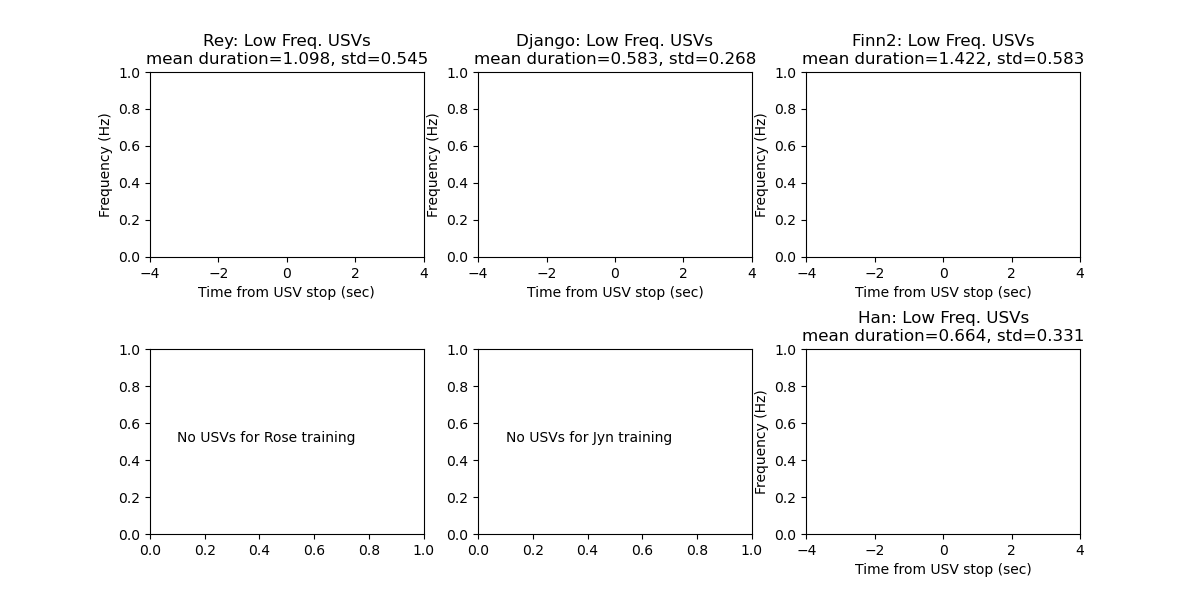

In [30]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

freq_thresh = 22
delta_freq_lims = [0.2, 3.5]
usv_buffer_sec = (2, 2)
fig, ax = plt.subplots(2, 3, figsize=(12, 6))

for (animal, sess_name), sess, usv_epochs, a in zip(training_sessions, rec_list, usv_list, ax.reshape(-1)):
    low_usvs = usv_epochs._epochs[usv_epochs._epochs.Freq_Min < freq_thresh]
    
    if low_usvs.shape[0] > 0:
        wv_delta_mean = sess.wv_delta.get_pe_mean_spec(low_usvs['stop'].values, buffer_sec=usv_buffer_sec, 
                                                       ignore_epochs=sess.art_epochs, print_ignored_frames=False)
        plot_spectrogram(wv_delta_mean, time_lims=np.multiply(usv_buffer_sec, (-2, 2)), freq_lims=delta_freq_lims, ax=a)
        a.set_xlabel('Time from USV stop (sec)')
        # Insert line break for title
        title_text = f"{animal}: Low Freq. USVs\nmean duration={low_usvs.Duration.mean():.3f}, std={low_usvs.Duration.std():.3f}"
        a.set_title(title_text)
    else:
        a.text(0.1, 0.5, f"No USVs for {animal} {sess_name}")

plt.subplots_adjust(hspace=0.5)

In [31]:
fig.savefig('/home/bowenw/Documents/thesisplots/group_delta_low_usv_offset.png')

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

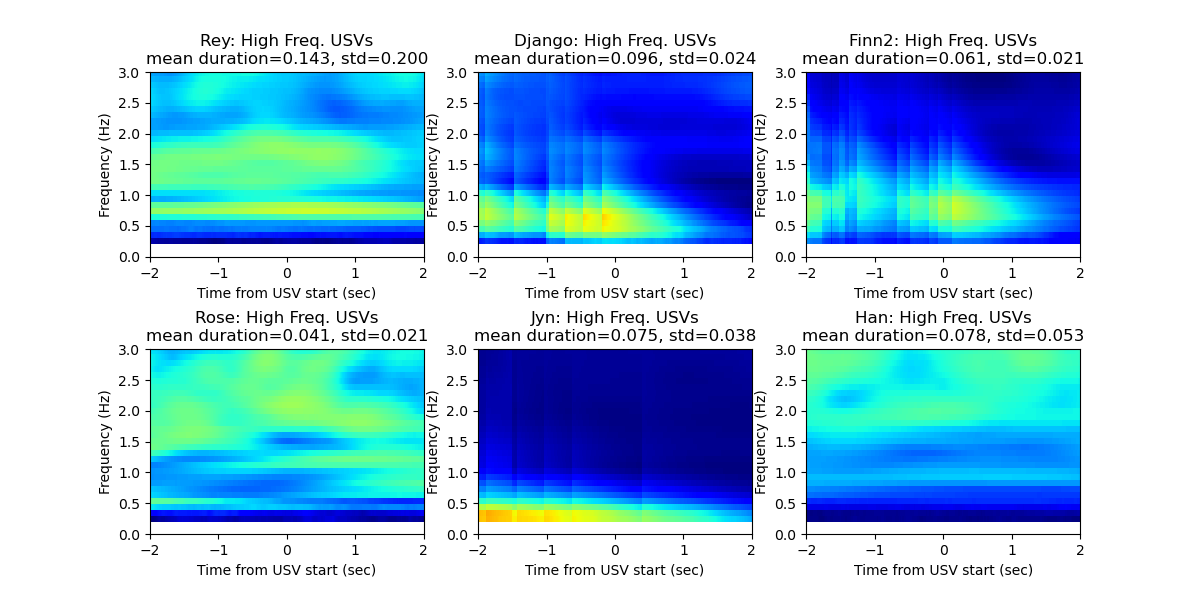

In [85]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

freq_thresh = 22
delta_freq_lims = [0.2, 3.5]
usv_buffer_sec = (2, 2)
fig, ax = plt.subplots(2, 3, figsize=(12, 6))

for (animal, sess_name), sess, usv_epochs, a in zip(training_sessions, rec_list, usv_list, ax.reshape(-1)):
    high_usvs = usv_epochs._epochs[usv_epochs._epochs.Freq_Min > freq_thresh]
    
    if high_usvs.shape[0] > 0:
        wv_delta_mean = sess.wv_delta.get_pe_mean_spec(high_usvs['start'].values, buffer_sec=usv_buffer_sec, 
                                                       ignore_epochs=sess.art_epochs, print_ignored_frames=False)
        plot_spectrogram(wv_delta_mean, time_lims=np.multiply(usv_buffer_sec, (-1, 1)), freq_lims=delta_freq_lims, ax=a)
        a.set_xlabel('Time from USV start (sec)')

        title_text = f"{animal}: High Freq. USVs\nmean duration={high_usvs.Duration.mean():.3f}, std={high_usvs.Duration.std():.3f}"
        a.set_title(title_text)
    else:
        a.text(0.1, 0.5, f"No USVs for {animal} {sess_name}")

plt.subplots_adjust(hspace=0.5)

In [86]:
fig.savefig('/home/bowenw/Documents/thesisplots/group_delta_high_usv_onset.png')

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

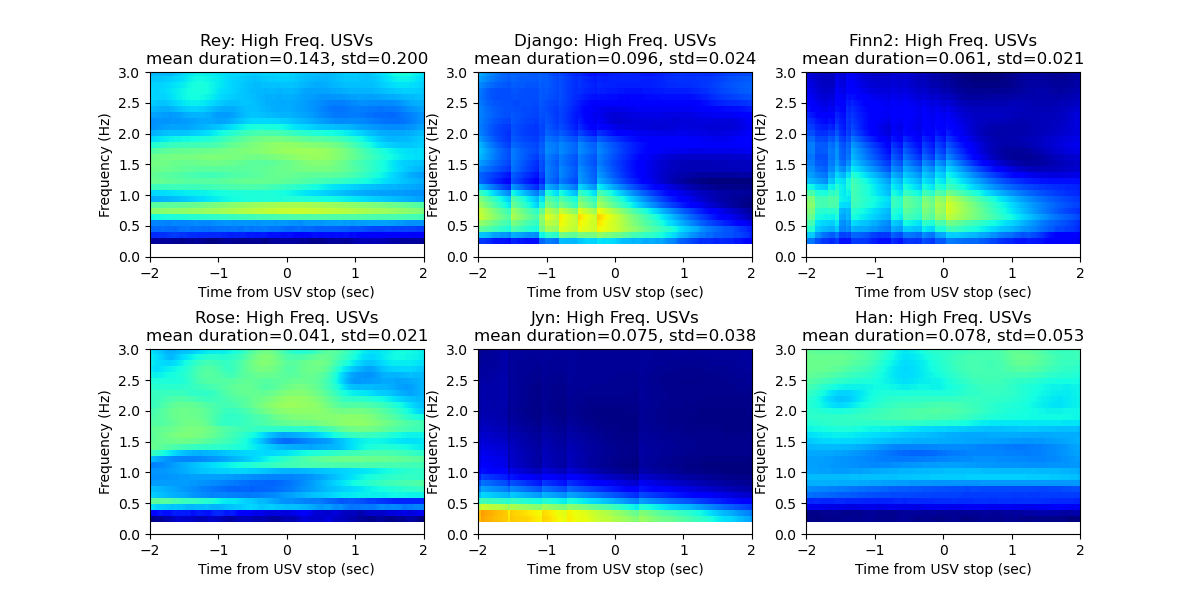

In [87]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

freq_thresh = 22
delta_freq_lims = [0.2, 3.5]
usv_buffer_sec = (2, 2)
fig, ax = plt.subplots(2, 3, figsize=(12, 6))

for (animal, sess_name), sess, usv_epochs, a in zip(training_sessions, rec_list, usv_list, ax.reshape(-1)):
    high_usvs = usv_epochs._epochs[usv_epochs._epochs.Freq_Min > freq_thresh]
    
    if high_usvs.shape[0] > 0:
        wv_delta_mean = sess.wv_delta.get_pe_mean_spec(high_usvs['stop'].values, buffer_sec=usv_buffer_sec, 
                                                       ignore_epochs=sess.art_epochs, print_ignored_frames=False)
        plot_spectrogram(wv_delta_mean, time_lims=np.multiply(usv_buffer_sec, (-1, 1)), freq_lims=delta_freq_lims, ax=a)
        a.set_xlabel('Time from USV stop (sec)')

        title_text = f"{animal}: High Freq. USVs\nmean duration={high_usvs.Duration.mean():.3f}, std={high_usvs.Duration.std():.3f}"
        a.set_title(title_text)
    else:
        a.text(0.1, 0.5, f"No USVs for {animal} {sess_name}")

plt.subplots_adjust(hspace=0.5)

In [35]:
fig.savefig('/home/bowenw/Documents/thesisplots/group_delta_high_usv_offset.png')